<h1><center> Figure 1: raw betas (historical, ssp5 and differences) and intercepts as supplementary </center></h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from glob import glob
import subprocess
import seaborn as sns
import IPython.display as display
%matplotlib inline

import matplotlib.gridspec as gridspec
from matplotlib import ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
from netCDF4 import Dataset as netcdf_dataset
from cartopy import config
from PIL import Image


In [2]:
#import data and create dictionary
# create a dictionary with the datasets
file_list = glob('/work/m1c/CMIP6_biome_PSS_data/*.nc')

file_list_biovol = glob('/work/m1c/CMIP6_biome_PSS_data/*biovolume.nc')
file_list_biovol_zoo_only = [x for x in file_list_biovol if 'zoo-only' in x]
file_list_biovol_phyto_only = [x for x in file_list_biovol if 'phyto-only' in x]
file_list_biovol = list(set(file_list_biovol).difference(file_list_biovol_zoo_only+file_list_biovol_phyto_only))

file_list_climatology = glob('/work/m1c/CMIP6_biome_PSS_data/*climatology_all*')

file_list_gCarbon = list(set(file_list).difference(file_list_biovol+file_list_climatology))

In [3]:


model_list = ['CESM', 'CMCC','CNRM','GFDL', 'GISS','IPSL','UKESM']
ds_dict = {}
ds_dict['hist'] = {}
ds_dict['ssp5'] = {}
for e in ['hist', 'ssp5']:
    for m in model_list:
        model_path = [x for x in file_list_biovol if e in x and m in x]
        ds_dict[e][m]= xr.open_mfdataset(model_path).mean(dim=['time'])
        #if m != 'GFDL':
        #ds_dict[m].reindex(lat=list(reversed(ds_dict[m].lat)))

In [4]:
for r, m in enumerate(model_list):
    print(m)
    ds_dict['hist'][m]=ds_dict['hist'][m].assign(betas_ssp5=ds_dict['ssp5'][m].betas_ssp5)
    ds_dict['hist'][m]=ds_dict['hist'][m].assign(betas_diff=ds_dict['ssp5'][m].betas_ssp5-ds_dict['hist'][m].betas_hist)
    
    #intercept_hist = ds_dict['hist'][m]['intercept_hist'].values
    #intercept_ssp5 = ds_dict['ssp5'][m]['intercept_ssp5'].values
    
    
    #ds_dict['hist'][m]['intercept_hist']= (('lat', 'lon'),10**(intercept_hist))
    #ds_dict['hist'][m]['intercept_ssp5']= (('lat', 'lon'),10**(intercept_ssp5))
    #ds_dict['ssp5'][m]['intercept_ssp5']= (('lat', 'lon'),10**(intercept_ssp5))

    ds_dict['hist'][m]=ds_dict['hist'][m].assign(intercept_ssp5=ds_dict['ssp5'][m].intercept_ssp5)    
    ds_dict['hist'][m]=ds_dict['hist'][m].assign(intercept_diff=ds_dict['ssp5'][m].intercept_ssp5-ds_dict['hist'][m].intercept_hist)
    
    ds_dict['hist'][m]=ds_dict['hist'][m].assign(total_biovolume_ssp5=ds_dict['ssp5'][m].total_biovolume_ssp5)    
    ds_dict['hist'][m]=ds_dict['hist'][m].assign(total_biovolume_diff=ds_dict['ssp5'][m].total_biovolume_ssp5-ds_dict['hist'][m].total_biovolume_hist)
    
    ds_dict['hist'][m]=ds_dict['hist'][m].assign(R2_ssp5=ds_dict['ssp5'][m].R2_ssp5)                                             
    ds_dict['hist'][m]=ds_dict['hist'][m].assign(R2_diff=ds_dict['ssp5'][m].intercept_ssp5-ds_dict['hist'][m].intercept_hist)
    
    #ds_dict['hist'][m] = ds_dict['hist'][m].assign_coords(lat=(ds_dict['hist'][m].lat * -1))


#ds_dict['COBALT'] = ds_dict['COBALT'].assign_coords(lat=(ds_dict['UKESM'].lat))
#ds_dict['hist']['GFDL'] = ds_dict['hist']['GFDL'].assign_coords(lon=(ds_dict['hist']['GFDL'].lon + 180))
#ds_dict['hist']['GFDL'] = ds_dict['hist']['GFDL'].assign_coords(lat=(ds_dict['hist']['GFDL'].lat * -1))

CESM
CMCC
CNRM
GFDL
GISS
IPSL
UKESM


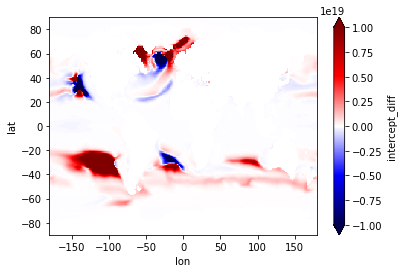

In [5]:
ds_dict['hist']['GISS'].intercept_diff.plot(cmap='seismic', vmin=-1e19, vmax=1e19)

In [6]:
np.nanmax(ds_dict['hist']['GISS'].intercept_hist)- np.nanmax(ds_dict['ssp5']['GISS'].intercept_ssp5)

-6.299836816242526e+20

In [7]:
np.nanmax(ds_dict['hist']['GISS'].intercept_hist)

2.6439124921083514e+20

In [8]:
np.nanmax(ds_dict['ssp5']['GISS'].intercept_ssp5)

8.943749308350878e+20

In [9]:
ds_dict['hist']['GFDL']

<xarray.Dataset>
Dimensions:               (lat: 180, lon: 360, biovol_um3: 50)
Coordinates:
  * lat                   (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                   (lon) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * biovol_um3            (biovol_um3) float64 0.09575 0.181 ... 3.104e+12
Data variables: (12/29)
    biomes                (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    chl                   (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    NB                    (biovol_um3, lat, lon) float64 dask.array<chunksize=(50, 180, 360), meta=np.ndarray>
    total_biovolume_hist  (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    betas_hist            (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    intercept_hist        (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    ...                    ...
    intercept_ssp5        (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    intercept_diff        (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    total_biovolume_ssp5  (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    total_biovolume_diff  (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    R2_ssp5               (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    R2_diff               (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>

In [10]:
import tabulate

In [11]:
data_mean = [['Model', 'simulation', 'Slope', 'Intercept', 'Biovolume','Determination_Coefficient'],
             
        ['CESM','','','','',''],
             ['','historical', str(np.round(np.nanmean(ds_dict['hist']['CESM'].betas_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CESM'].betas_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CESM'].betas_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['CESM'].intercept_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CESM'].intercept_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CESM'].intercept_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['CESM'].total_biovolume_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CESM'].total_biovolume_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CESM'].total_biovolume_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['CESM'].R2_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CESM'].R2_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CESM'].R2_hist.values),3))+')',],
             
             ['','ssp5',str(np.round(np.nanmean(ds_dict['hist']['CESM'].betas_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CESM'].betas_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CESM'].betas_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['CESM'].intercept_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CESM'].intercept_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CESM'].intercept_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['CESM'].total_biovolume_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CESM'].total_biovolume_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CESM'].total_biovolume_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['CESM'].R2_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CESM'].R2_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CESM'].R2_ssp5.values),3))+')',],
             
         ['CMCC','','','','',''],
             ['','historical', str(np.round(np.nanmean(ds_dict['hist']['CMCC'].betas_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CMCC'].betas_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CMCC'].betas_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['CMCC'].intercept_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CMCC'].intercept_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CMCC'].intercept_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['CMCC'].total_biovolume_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CMCC'].total_biovolume_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CMCC'].total_biovolume_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['CMCC'].R2_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CMCC'].R2_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CMCC'].R2_hist.values),3))+')',],
             
             ['','ssp5',str(np.round(np.nanmean(ds_dict['hist']['CMCC'].betas_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CMCC'].betas_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CMCC'].betas_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['CMCC'].intercept_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CMCC'].intercept_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CMCC'].intercept_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['CMCC'].total_biovolume_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CMCC'].total_biovolume_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CMCC'].total_biovolume_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['CMCC'].R2_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CMCC'].R2_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CMCC'].R2_ssp5.values),3))+')',],

         ['CNRM','','','','',''],
             ['','historical', str(np.round(np.nanmean(ds_dict['hist']['CNRM'].betas_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CNRM'].betas_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CNRM'].betas_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['CNRM'].intercept_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CNRM'].intercept_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CNRM'].intercept_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['CNRM'].total_biovolume_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CNRM'].total_biovolume_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CNRM'].total_biovolume_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['CNRM'].R2_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CNRM'].R2_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CNRM'].R2_hist.values),3))+')',],
             
             ['','ssp5',str(np.round(np.nanmean(ds_dict['hist']['CNRM'].betas_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CNRM'].betas_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CNRM'].betas_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['CNRM'].intercept_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CNRM'].intercept_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CNRM'].intercept_ssp5.values),3))+')',    
                               str(np.round(np.nanmean(ds_dict['hist']['CNRM'].total_biovolume_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CNRM'].total_biovolume_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CNRM'].total_biovolume_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['CNRM'].R2_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['CNRM'].R2_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['CNRM'].R2_ssp5.values),3))+')',],
             
         ['GFDL','','','','',''],
            ['','historical', str(np.round(np.nanmean(ds_dict['hist']['GFDL'].betas_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['GFDL'].betas_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['GFDL'].betas_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['GFDL'].intercept_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['GFDL'].intercept_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['GFDL'].intercept_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['GFDL'].total_biovolume_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['GFDL'].total_biovolume_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['GFDL'].total_biovolume_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['GFDL'].R2_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['GFDL'].R2_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['GFDL'].R2_hist.values),3))+')',],
             
             ['','ssp5',str(np.round(np.nanmean(ds_dict['hist']['GFDL'].betas_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['GFDL'].betas_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['GFDL'].betas_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['GFDL'].intercept_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['GFDL'].intercept_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['GFDL'].intercept_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['GFDL'].total_biovolume_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['GFDL'].total_biovolume_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['GFDL'].total_biovolume_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['GFDL'].R2_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['GFDL'].R2_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['GFDL'].R2_ssp5.values),3))+')',],
             
         ['GISS','','','','',''],
             ['','historical', str(np.round(np.nanmean(ds_dict['hist']['GISS'].betas_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['GISS'].betas_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['GISS'].betas_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['GISS'].intercept_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['GISS'].intercept_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['GISS'].intercept_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['GISS'].total_biovolume_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['GISS'].total_biovolume_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['GISS'].total_biovolume_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['GISS'].R2_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['GISS'].R2_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['GISS'].R2_hist.values),3))+')',],
             
             ['','ssp5',str(np.round(np.nanmean(ds_dict['hist']['GISS'].betas_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['GISS'].betas_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['GISS'].betas_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['GISS'].intercept_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['GISS'].intercept_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['GISS'].intercept_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['GISS'].total_biovolume_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['GISS'].total_biovolume_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['GISS'].total_biovolume_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['GISS'].R2_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['GISS'].R2_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['GISS'].R2_ssp5.values),3))+')',],
             
         ['IPSL','','','','',''],
             ['','historical', str(np.round(np.nanmean(ds_dict['hist']['IPSL'].betas_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['IPSL'].betas_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['IPSL'].betas_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['IPSL'].intercept_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['IPSL'].intercept_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['IPSL'].intercept_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['IPSL'].total_biovolume_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['IPSL'].total_biovolume_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['IPSL'].total_biovolume_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['IPSL'].R2_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['IPSL'].R2_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['IPSL'].R2_hist.values),3))+')',],
             
             ['','ssp5',str(np.round(np.nanmean(ds_dict['hist']['IPSL'].betas_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['IPSL'].betas_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['IPSL'].betas_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['IPSL'].intercept_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['IPSL'].intercept_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['IPSL'].intercept_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['IPSL'].total_biovolume_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['IPSL'].total_biovolume_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['IPSL'].total_biovolume_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['IPSL'].R2_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['IPSL'].R2_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['IPSL'].R2_ssp5.values),3))+')',],
              
         ['UKESM','','','','',''],
             ['','historical', str(np.round(np.nanmean(ds_dict['hist']['UKESM'].betas_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['UKESM'].betas_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['UKESM'].betas_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['UKESM'].intercept_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['UKESM'].intercept_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['UKESM'].intercept_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['UKESM'].total_biovolume_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['UKESM'].total_biovolume_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['UKESM'].total_biovolume_hist.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['UKESM'].R2_hist.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['UKESM'].R2_hist.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['UKESM'].R2_hist.values),3))+')',],
             
             ['','ssp5',str(np.round(np.nanmean(ds_dict['hist']['UKESM'].betas_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['UKESM'].betas_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['UKESM'].betas_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['UKESM'].intercept_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['UKESM'].intercept_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['UKESM'].intercept_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['UKESM'].total_biovolume_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['UKESM'].total_biovolume_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['UKESM'].total_biovolume_ssp5.values),3))+')',
                               str(np.round(np.nanmean(ds_dict['hist']['UKESM'].R2_ssp5.values),3)) +' ('+str(np.round(np.nanmin(ds_dict['hist']['UKESM'].R2_ssp5.values),3))+', '+str(np.round(np.nanmax(ds_dict['hist']['UKESM'].R2_ssp5.values),3))+')',]]
table = tabulate.tabulate(data_mean, tablefmt='csv')
text_file=open("NBSS_means_table.csv","w")
text_file.write(table)
text_file.close()

In [12]:
pwd()


'/work5/m1c/CMIP6_size_spectra_scripts'

In [12]:
letters = ['a.','b.','c.','d.','e.','f.','g.','h.','i.','j.','k.','l.','m.','n.','o.','p.','q.','r.','s.','t.' ,'u.']

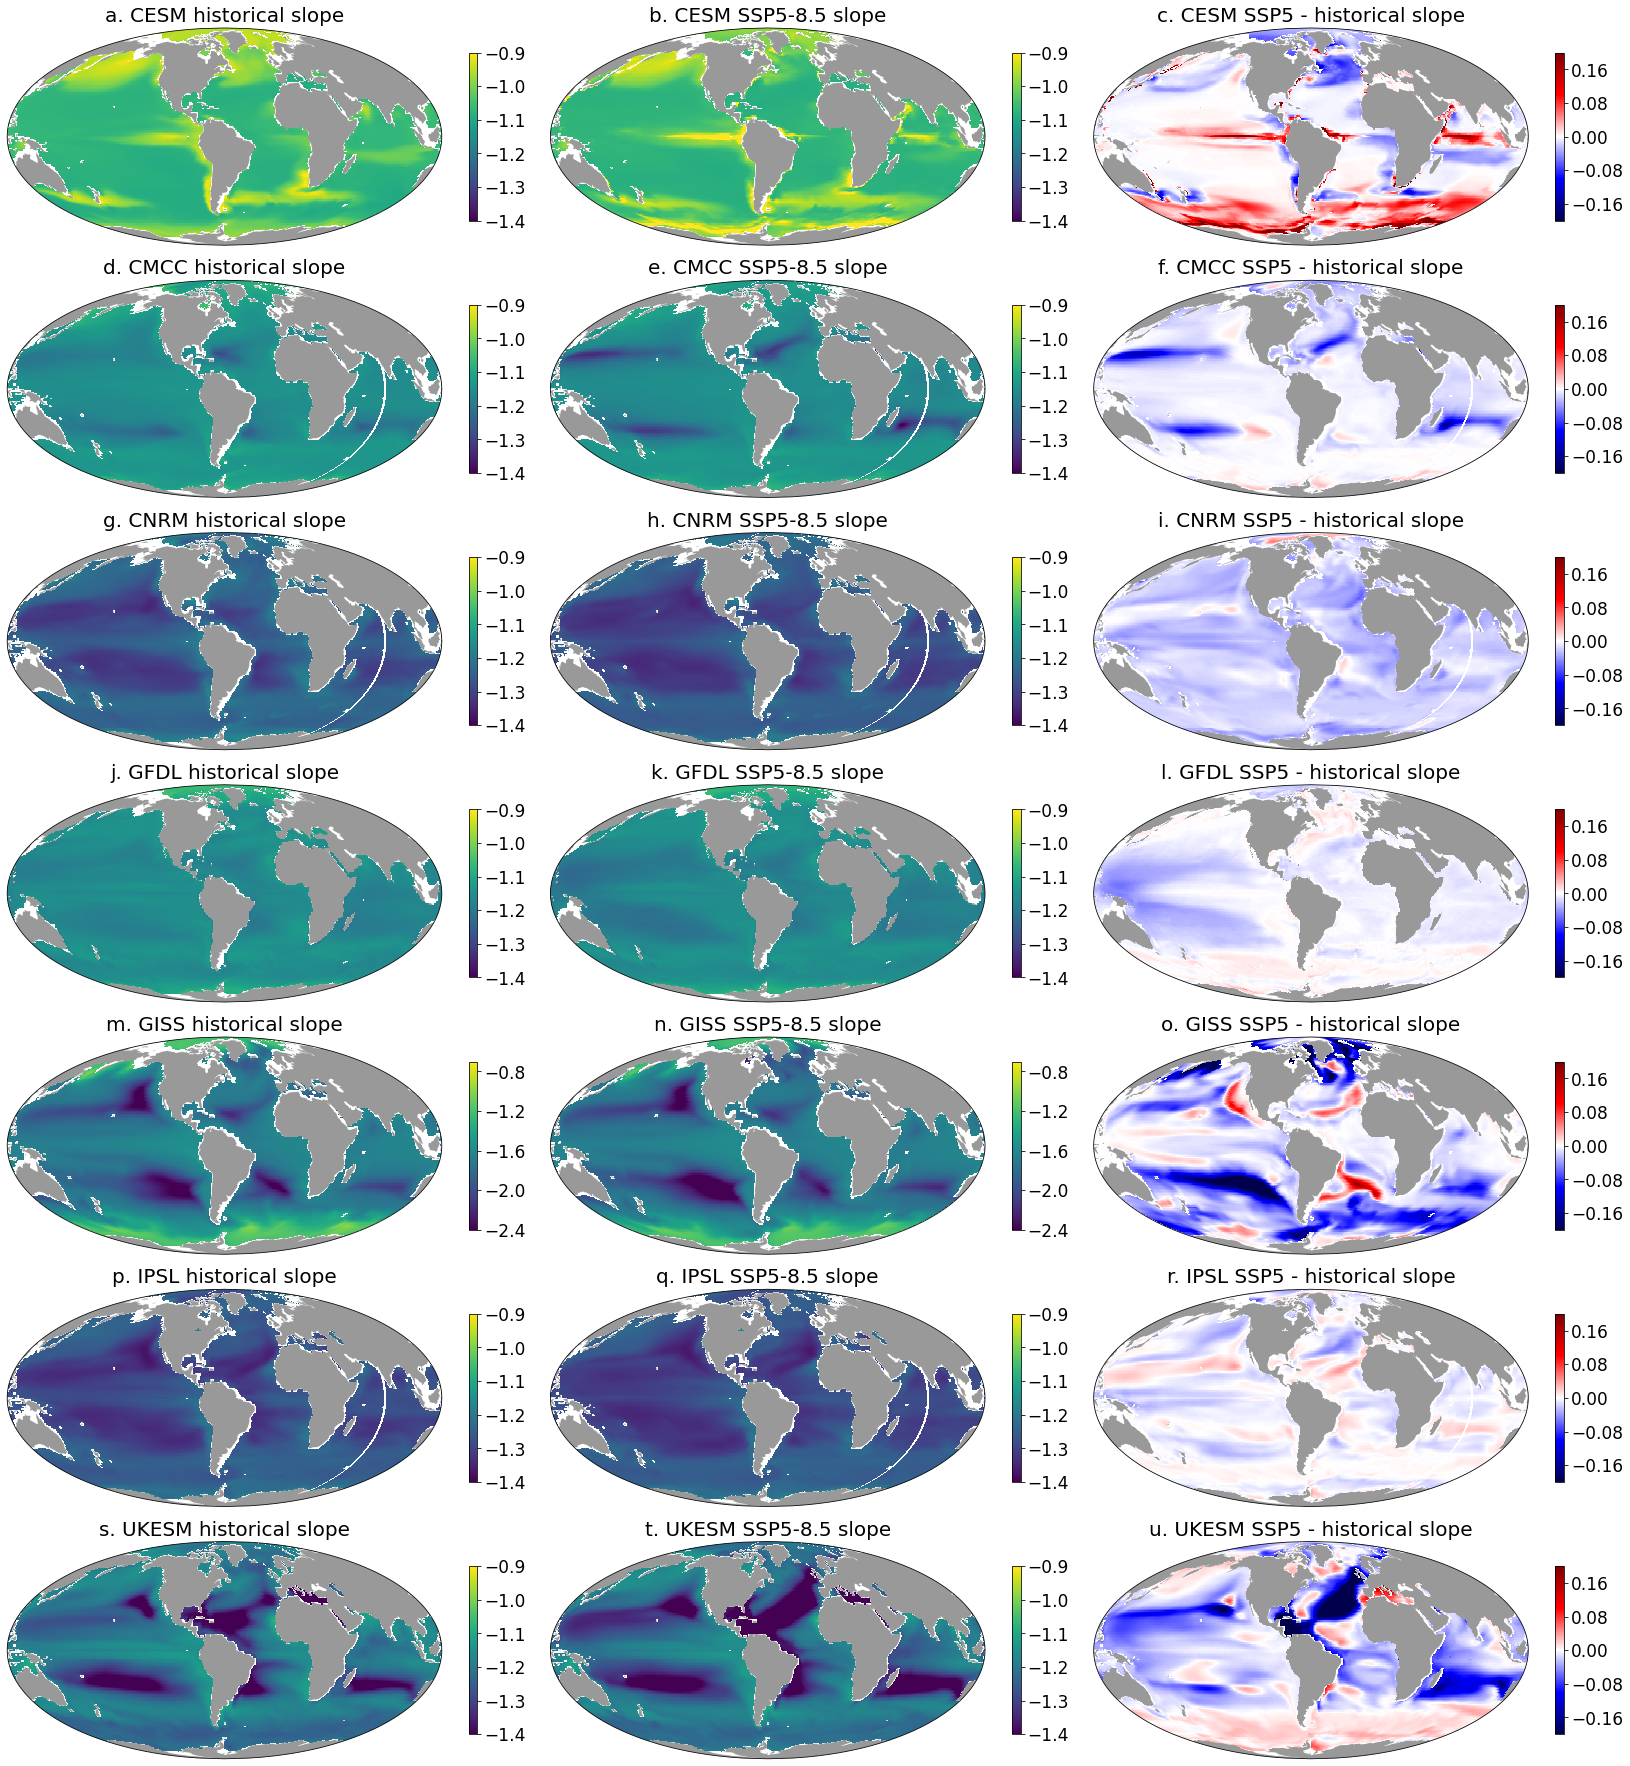

In [13]:
# create the 7x3 grid of subplots using gridspec
fig = plt.figure(figsize=(23,33))
gs = gridspec.GridSpec(nrows=7, ncols=3, figure=fig)
m=0
# plot the data on the subplots
axs = [None]*21
cs = [None]*21
for i in range(21):
    axs[i] = plt.subplot(gs[i],projection=ccrs.Mollweide(central_longitude=300))
    axs[i].add_feature(cfeature.LAND,  facecolor='#999999')
    v_min=-1.4
    v_max=-0.9
    #if model_list[m] == 'CESM':
        #v_max=-0.95
        #v_min=-1.1
    #if model_list[m] == 'CMCC':
        #v_max=-1.1
        #v_min=-1.2
    #if model_list[m] == 'CNRM':
        #v_max=-1.2
        #v_min=-1.3
    #if model_list[m] == 'GFDL':
        #v_max=-1.1
        #v_min=-1.2
    if model_list[m] == 'GISS':
        v_max=-0.7
        v_min=-2.4
    #if model_list[m] == 'IPSL':
        #v_max=-1.2
        #v_min=-1.3
    #if model_list[m] == 'UKESM':
        #v_max=-1.1
        #v_min=-1.3
    if i % 3 == 0:
        cs[i]=ds_dict['hist'][model_list[m]]['betas_hist'].plot.imshow(ax=axs[i], origin = 'lower', transform=ccrs.PlateCarree(), vmin=v_min, vmax=v_max, cmap='viridis', add_colorbar=False) #, add_colorbar=False , cbar_kwargs={'shrink': 0.3,  "spacing": "proportional"}
        axs[i].set_title((letters[i]+' '+model_list[m]+ ' historical slope'), fontsize=20)

    elif i % 3 == 1:
        cs[i]=ds_dict['hist'][model_list[m]]['betas_ssp5'].plot.imshow(ax=axs[i], origin = 'lower', transform=ccrs.PlateCarree(), vmin=v_min, vmax=v_max, cmap='viridis', add_colorbar=False)
        axs[i].set_title((letters[i]+' '+model_list[m]+ ' SSP5-8.5 slope'), fontsize=20)

    else:
        cs[i]=ds_dict['hist'][model_list[m]]['betas_diff'].plot.imshow(ax=axs[i], origin = 'lower', transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2, cmap='seismic', add_colorbar=False)
        axs[i].set_title((letters[i]+' '+model_list[m]+ ' SSP5 - historical slope'), fontsize=20)

        m+=1

    #divider = make_axes_locatable(cs[i])
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    bar = plt.colorbar(cs[i], shrink = 0.2)
    tick_locator = ticker.MaxNLocator(nbins=5)
    bar.locator = tick_locator
    bar.update_ticks()
    for t in bar.ax.get_yticklabels():
        t.set_fontsize(17)
    #if i ==11:
        #bar.set_label(r'Slope ( m$^{-2}$ $\mu$m$^{-3}$)', fontsize=25, rotation=-90,  labelpad=25)
    
    
plt.tight_layout()
fig.subplots_adjust(wspace=0, hspace=-0.7)
plt.savefig('/work/m1c/CMIP6_size_spectra_scripts/plots/fig_slopes_maps_biovolume.pdf', dpi=300)

In [14]:
import matplotlib.ticker as ticker
def fmt(x, pos):
    a, b = '{:.0e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

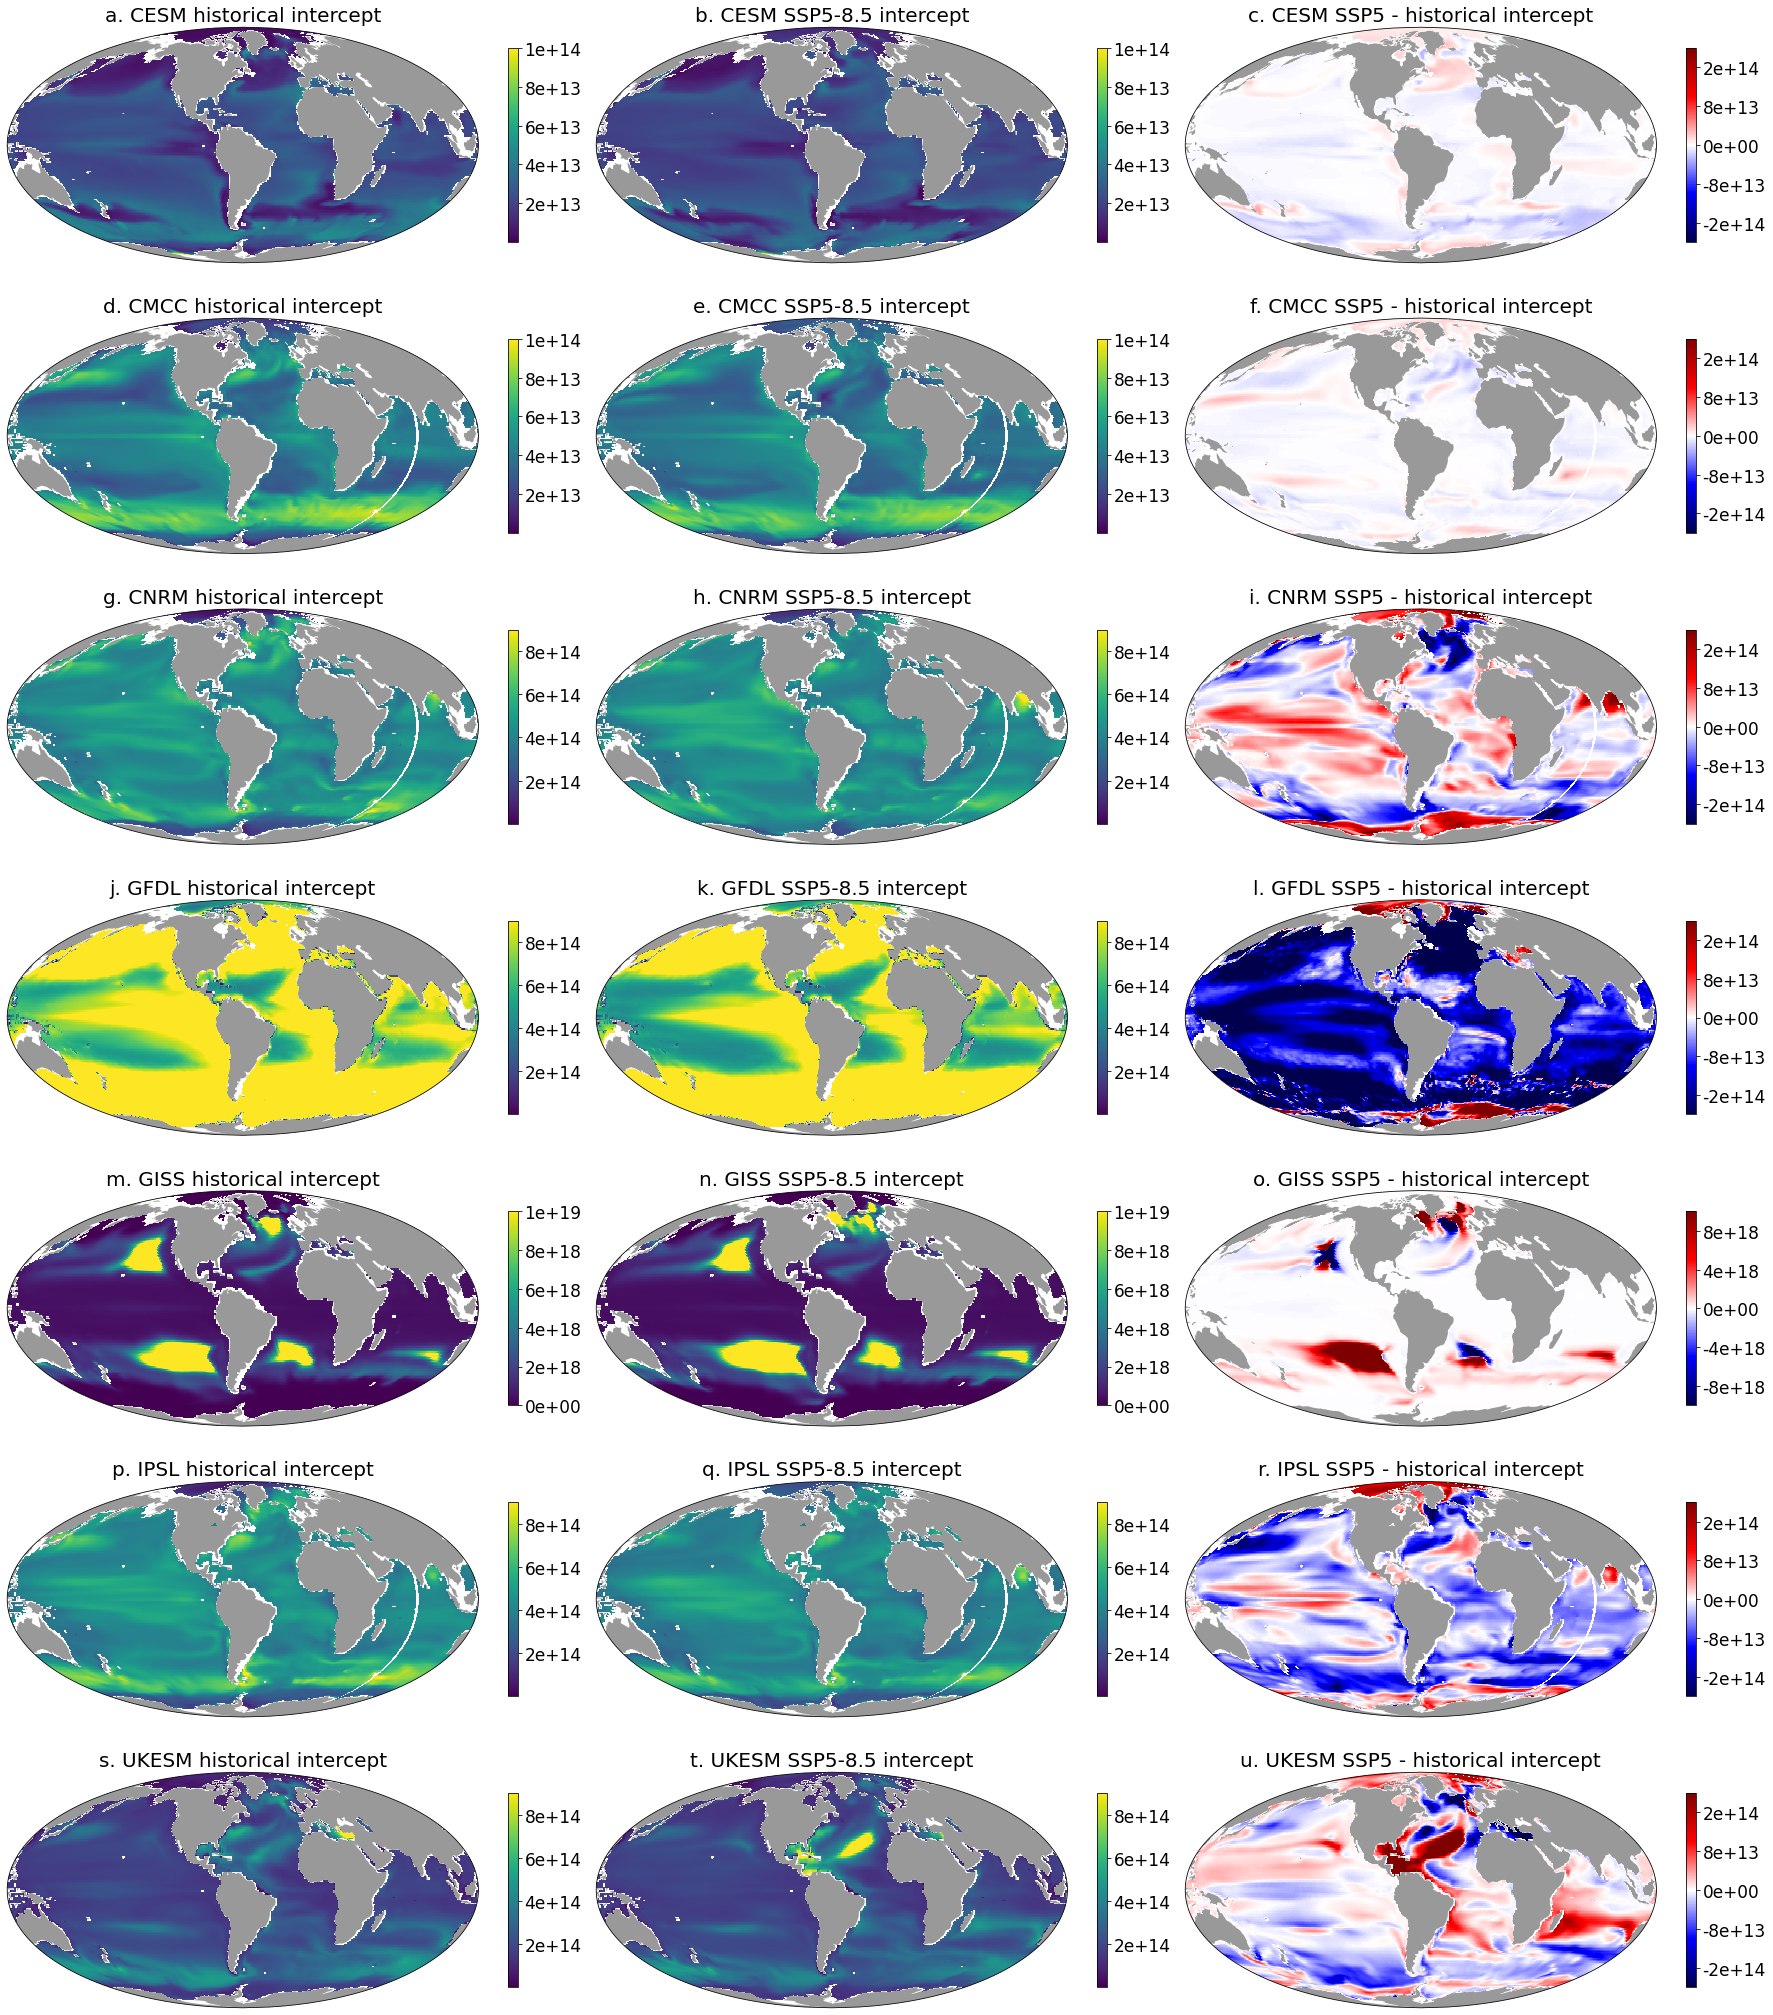

In [15]:
# create the 7x3 grid of subplots using gridspec
fig = plt.figure(figsize=(25,38))
gs = gridspec.GridSpec(nrows=7, ncols=3, figure=fig)
m=0
# plot the data on the subplots
axs = [None]*21
cs = [None]*21
for i in range(21):
    axs[i] = plt.subplot(gs[i],projection=ccrs.Mollweide(central_longitude=300))
    axs[i].add_feature(cfeature.LAND,  facecolor='#999999')
    v_max=9e14
    v_min=1e5
    if model_list[m] == 'CESM' or model_list[m] == 'CMCC':
        v_max=1e14
        v_min=1e5
    #if model_list[m] == 'CMCC':
        #v_max=8e13
        #v_min=1e13
    #if model_list[m] == 'CNRM':
        #v_max=8e14
        #v_min=1e14
    #if model_list[m] == 'GFDL':
        #v_max=3e15
        #v_min=1e14
        #v_max_diff=1e15
        #v_min_diff=-1e15
    if model_list[m] == 'GISS':
        v_max=1e19
        v_min=1e7
        v_max_diff=1e19
        v_min_diff=-1e19
    #if model_list[m] == 'IPSL':
        #v_max=8e14
        #v_min=1e14
    #if model_list[m] == 'UKESM':
        #v_max=6e14
        #v_min=1e14
        #v_max_diff=1e14
        #v_min_diff=-1e14
    if i % 3 == 0:
        cs[i]=ds_dict['hist'][model_list[m]]['intercept_hist'].plot.imshow(ax=axs[i], origin = 'lower', transform=ccrs.PlateCarree(), vmin=v_min, vmax=v_max, cmap='viridis', add_colorbar=False) #, add_colorbar=False , cbar_kwargs={'shrink': 0.3,  "spacing": "proportional"}
        axs[i].set_title((letters[i]+' '+model_list[m]+ ' historical intercept'), fontsize=20)

    elif i % 3 == 1:
        cs[i]=ds_dict['hist'][model_list[m]]['intercept_ssp5'].plot.imshow(ax=axs[i], origin = 'lower', transform=ccrs.PlateCarree(), vmin=v_min, vmax=v_max, cmap='viridis', add_colorbar=False)
        axs[i].set_title((letters[i]+' '+model_list[m]+ ' SSP5-8.5 intercept'), fontsize=20)


        #
    else:
        if model_list[m]== 'GISS':
            cs[i]=ds_dict['hist'][model_list[m]]['intercept_diff'].plot.imshow(ax=axs[i], origin = 'lower', transform=ccrs.PlateCarree(),vmin=v_min_diff, vmax=v_max_diff, cmap='seismic', add_colorbar=False)
        else:
            cs[i]=ds_dict['hist'][model_list[m]]['intercept_diff'].plot.imshow(ax=axs[i], origin = 'lower', transform=ccrs.PlateCarree(), vmin=-2e14, vmax=2e14, cmap='seismic', add_colorbar=False)
        axs[i].set_title((letters[i]+' '+model_list[m]+ ' SSP5 - historical intercept'), fontsize=20)

        m+=1

    #divider = make_axes_locatable(cs[i])
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    bar = plt.colorbar(cs[i], shrink = 0.2, format='%.e')#, format=ticker.FuncFormatter(fmt)
    tick_locator = ticker.MaxNLocator(nbins=5)
    bar.locator = tick_locator
    bar.update_ticks()
    #bar.ax.set_yticklabels(["$10^{{{:.0f}}}$".format(i) for i in bar.get_ticks()])
    for t in bar.ax.get_yticklabels():
        t.set_fontsize(17)
    #if i ==11:
        #bar.set_label(r'Intercept ($\mu$m$^{3}$ m$^{-2}$ $\mu$m$^{-3}$', fontsize=25, rotation=-90, labelpad=27)
    
    
plt.tight_layout()
fig.subplots_adjust(wspace=0, hspace=-0.7)
plt.savefig('/work/m1c/CMIP6_size_spectra_scripts/plots/fig_intercept_maps_biovolume.pdf', dpi=300)

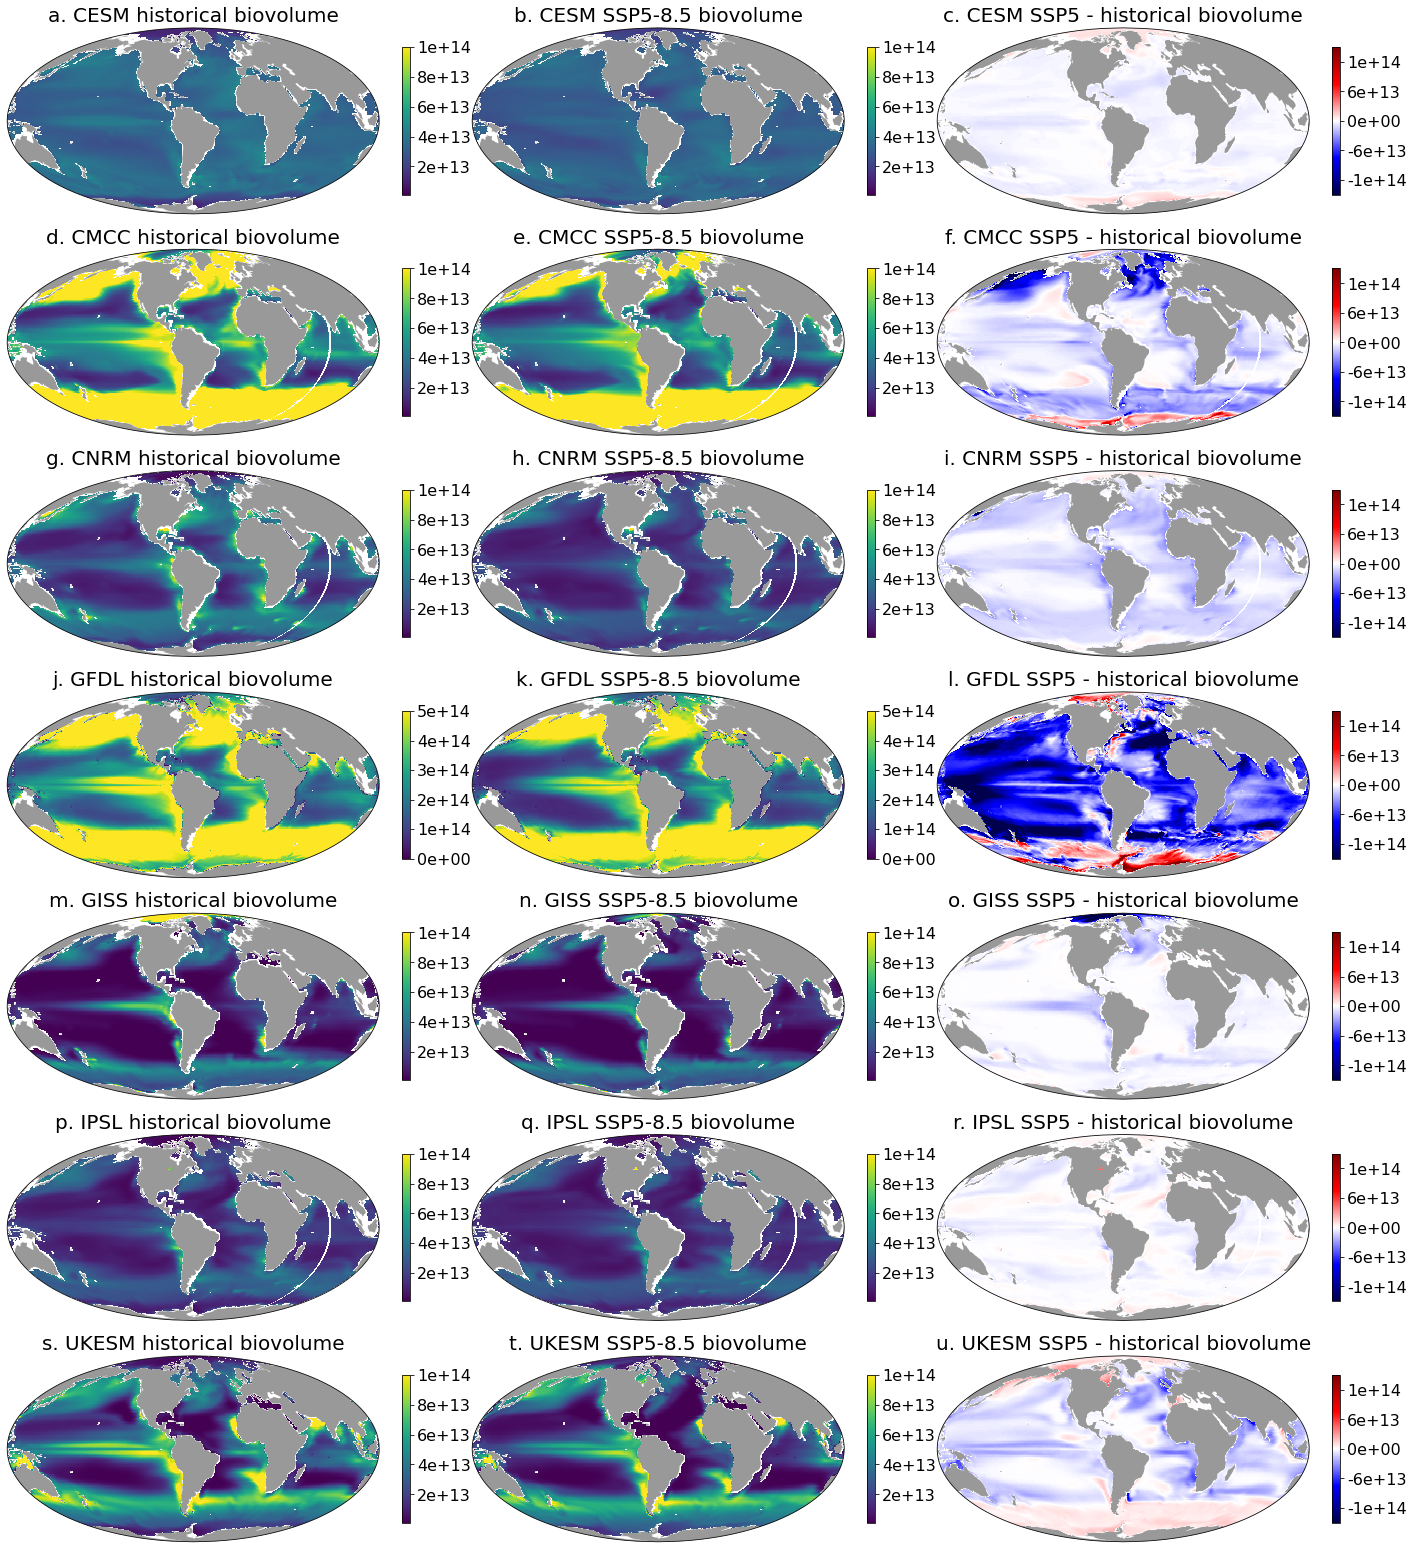

In [16]:
# create the 7x3 grid of subplots using gridspec
fig = plt.figure(figsize=(25,38))
gs = gridspec.GridSpec(nrows=7, ncols=3, figure=fig)
m=0
# plot the data on the subplots
axs = [None]*21
cs = [None]*21
for i in range(21):
    axs[i] = plt.subplot(gs[i],projection=ccrs.Mollweide(central_longitude=300))
    axs[i].add_feature(cfeature.LAND,  facecolor='#999999')
    if model_list[m] == 'GFDL':
        v_max=5e14
        v_min=1e2
    else:
        v_max=1e14
        v_min=1e12
    #if model_list[m] == 'CESM':
        
        #else:
            #v_max=4e13#10e13
            #v_min=1e13#5e13
    #if model_list[m] == 'CMCC':
        #v_max=20e13
        #v_min=1.5e12
    #if model_list[m] == 'CNRM':
        #v_max=5e13
        #v_min=8e12
    #if model_list[m] == 'GFDL':
        #v_max=10e14
        #v_min=15e13
    #if model_list[m] == 'GISS':
        #v_max=5e13
        #v_min=0.05e12
    #if model_list[m] == 'IPSL':
        #v_max=5e13
        #v_min=3e12
    #if model_list[m] == 'UKESM':
        #v_max=10e13
        #v_min=1e13
   
    if i % 3 == 0:
        cs[i]=ds_dict['hist'][model_list[m]]['total_biovolume_hist'].plot.imshow(ax=axs[i], origin = 'lower',vmin=v_min, vmax=v_max, transform=ccrs.PlateCarree(),  cmap='viridis', add_colorbar=False) #, add_colorbar=False , cbar_kwargs={'shrink': 0.3,  "spacing": "proportional"}
        axs[i].set_title((letters[i]+' '+model_list[m]+ ' historical biovolume'), fontsize=20)

    elif i % 3 == 1:
        cs[i]=ds_dict['hist'][model_list[m]]['total_biovolume_ssp5'].plot.imshow(ax=axs[i], origin = 'lower',vmin=v_min, vmax=v_max, transform=ccrs.PlateCarree(),  cmap='viridis', add_colorbar=False)
        axs[i].set_title((letters[i]+' '+model_list[m]+ ' SSP5-8.5 biovolume'), fontsize=20)

    else:
        cs[i]=ds_dict['hist'][model_list[m]]['total_biovolume_diff'].plot.imshow(ax=axs[i], origin = 'lower',vmin=-15e13, vmax=15e13, transform=ccrs.PlateCarree(),  cmap='seismic', add_colorbar=False)
        axs[i].set_title((letters[i]+' '+model_list[m]+ ' SSP5 - historical biovolume'), fontsize=20)

        m+=1

    #divider = make_axes_locatable(cs[i])
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    bar = plt.colorbar(cs[i], shrink = 0.2, format='%.e')
    tick_locator = ticker.MaxNLocator(nbins=5)
    bar.locator = tick_locator
    bar.update_ticks()
    for t in bar.ax.get_yticklabels():
        t.set_fontsize(16)
    #if i ==11:
        #bar.set_label(r'Biovolume ($\mu$m$^{3}$ m$^{-2}$)', fontsize=25, rotation=-90, labelpad=27)
    
    
#plt.tight_layout()
fig.subplots_adjust(wspace=0, hspace=-0.7)
plt.savefig('/work/m1c/CMIP6_size_spectra_scripts/plots/fig_total_biovolume_maps_biovolume.pdf', dpi=300)

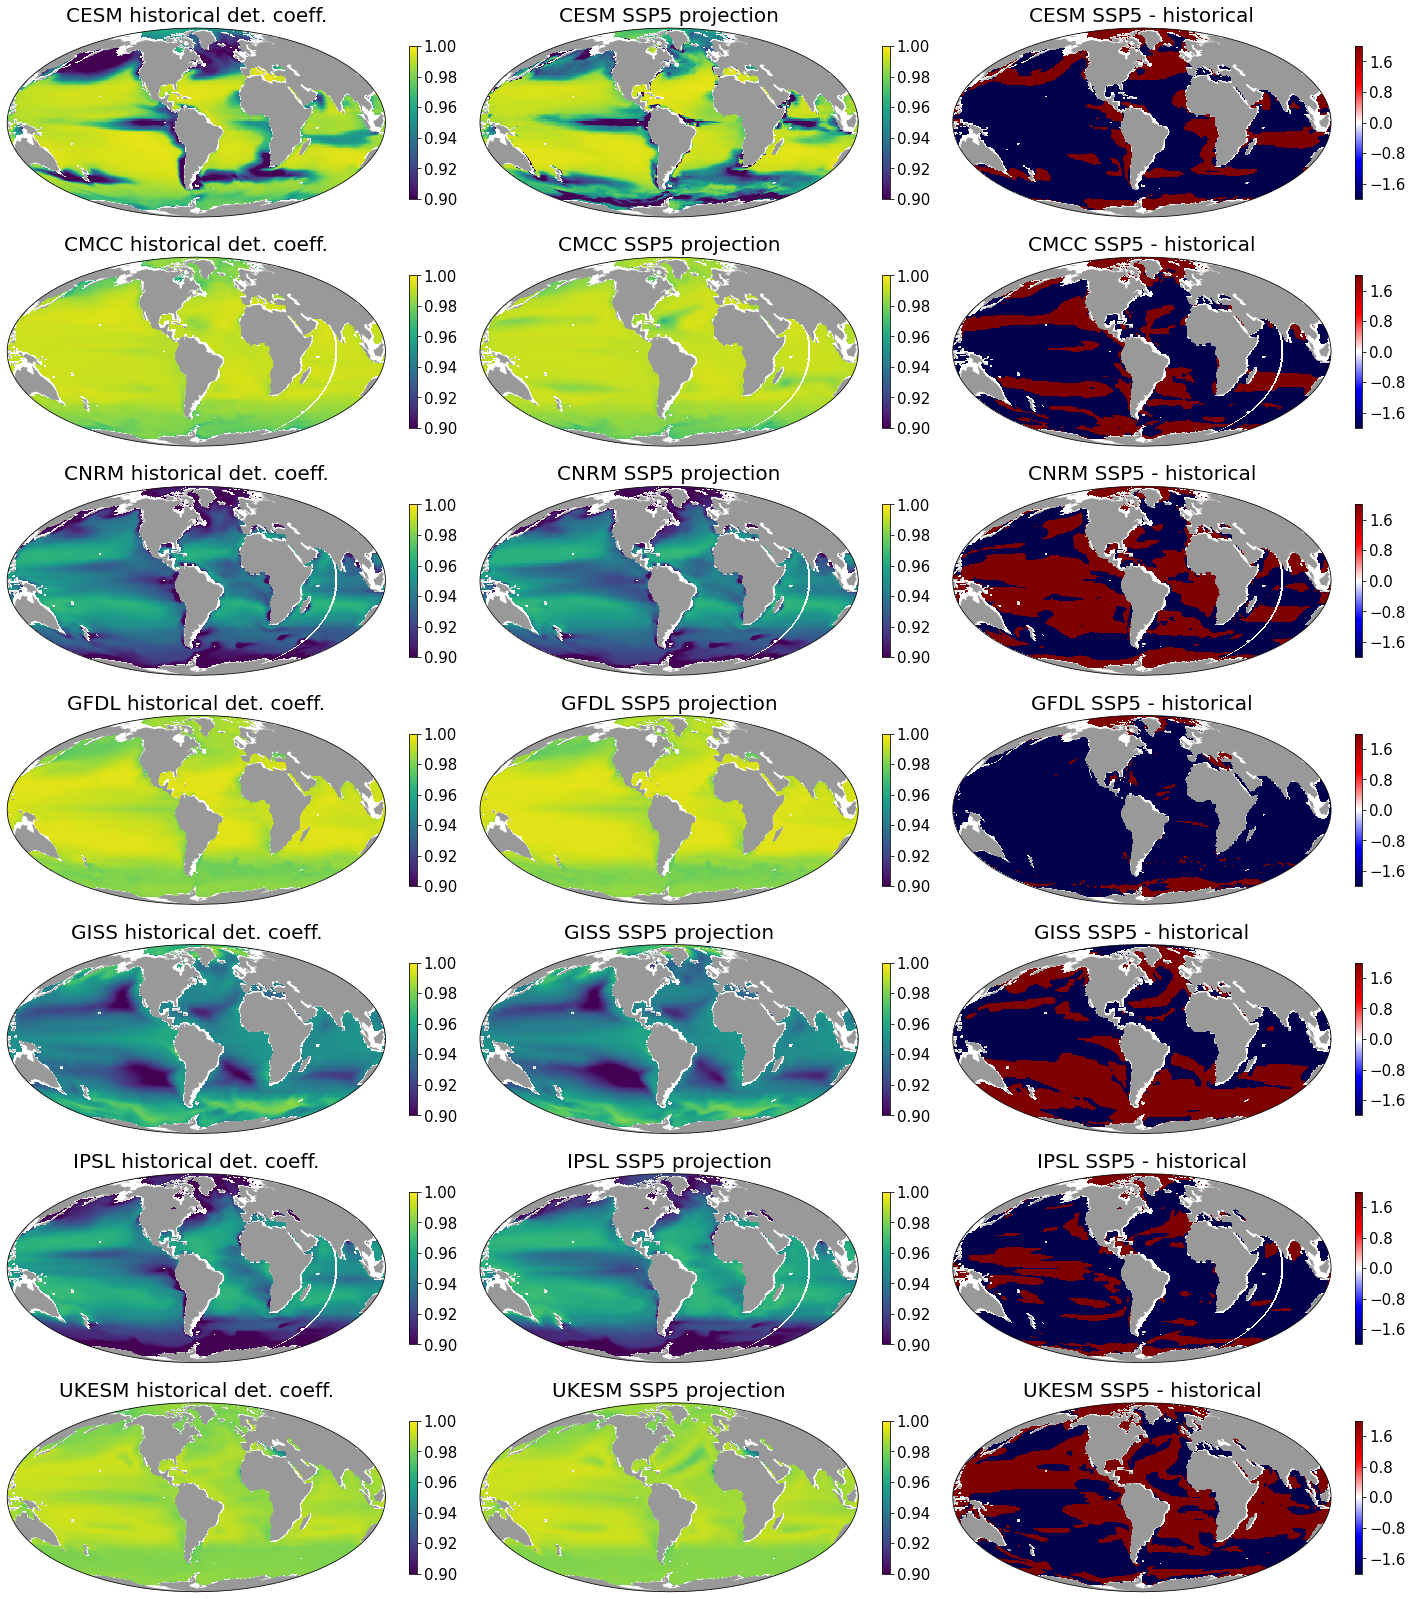

In [17]:
# create the 7x3 grid of subplots using gridspec
fig = plt.figure(figsize=(20,30))
gs = gridspec.GridSpec(nrows=7, ncols=3, figure=fig)
models = list(ds_dict.keys())
m=0

# plot the data on the subplots
axs = [None]*21
cs = [None]*21
for i in range(21):
    axs[i] = plt.subplot(gs[i],projection=ccrs.Mollweide(central_longitude=300))
    axs[i].add_feature(cartopy.feature.LAND,  facecolor='#999999')
    #v_min = np.nanmin(ds_dict[models[m]].intercept_ssp5.values)
    #v_max = np.nanmax(ds_dict[models[m]].intercept_ssp5.values)
    v_min=0.9
    v_max=1
    
    if i % 3 == 0:
        cs[i]=ds_dict['hist'][model_list[m]]['R2_hist'].plot.imshow(ax=axs[i], origin = 'lower', transform=ccrs.PlateCarree(), vmin=v_min, vmax=v_max, cmap='viridis', add_colorbar=False) #, add_colorbar=False
        axs[i].set_title((model_list[m]+ ' historical det. coeff.'), fontsize=20)
        #bar = plt.colorbar(cs[i])
        #bar.remove()
    elif i % 3 == 1:
        cs[i]=ds_dict['hist'][model_list[m]]['R2_ssp5'].plot.imshow(ax=axs[i], origin = 'lower', transform=ccrs.PlateCarree(), vmin=v_min, vmax=v_max, cmap='viridis', add_colorbar=False)
        axs[i].set_title((model_list[m]+ ' SSP5 projection'), fontsize=20)
    else:
        cs[i]=ds_dict['hist'][model_list[m]]['R2_diff'].plot.imshow(ax=axs[i], origin = 'lower', transform=ccrs.PlateCarree(), vmin=-2, vmax=2, cmap='seismic', add_colorbar=False)
        axs[i].set_title((model_list[m]+ ' SSP5 - historical'), fontsize=20)
        m+=1
    bar = plt.colorbar(cs[i], shrink = 0.2)
    tick_locator = ticker.MaxNLocator(nbins=5)
    bar.locator = tick_locator
    bar.update_ticks()
    for t in bar.ax.get_yticklabels():
        t.set_fontsize(15)
    
    
plt.tight_layout()
fig.subplots_adjust(wspace=0, hspace=-0.7)
plt.savefig('/work/m1c/CMIP6_size_spectra_scripts/plots/fig_R2_maps_biovolume.pdf', dpi=300)